In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set_context(font_scale=2)

from sklearn.preprocessing import Imputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

import itertools

In [4]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [6]:
data = data.replace({'Not Available':np.nan})

for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'gal' in col or 'Metric Tons C02e' in col or 'kWh' in col or 'therms' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [7]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Weather Normalized Site Electricity (kWh),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.096000e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,1.768752e+06,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,9.389154e+06,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,3.019974e+05,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,5.416312e+05,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,1.284677e+06,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.958273e+08,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [11]:
def missing_values_table(df):
    
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis = 1)
    
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',1:'% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values',ascending = False).round(1)
    
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\nThere are "+ str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    
    return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Your selected dataframe has 60 columns.
 There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [12]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values']>50].index)
print('We will remove %d columns.'% len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [13]:
data = data.drop(columns = list(missing_columns))

Text(0.5,1,'Energy Star Score Distribution')

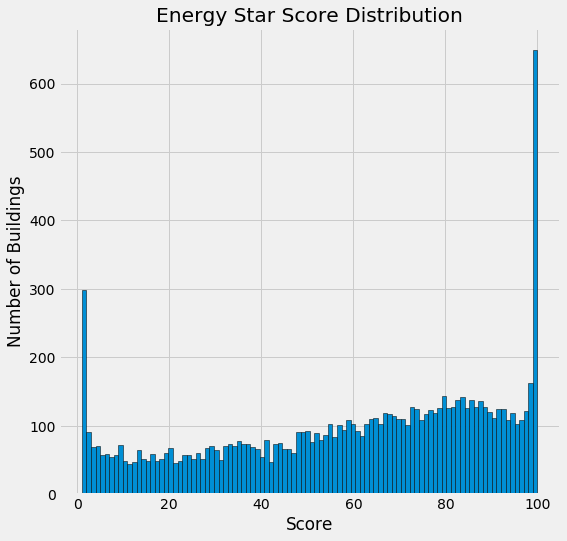

In [19]:
figsize(8, 8)

data = data.rename(columns = {'ENERGY STAR Score':'score'})

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5,1,'Site EUI Distribution')

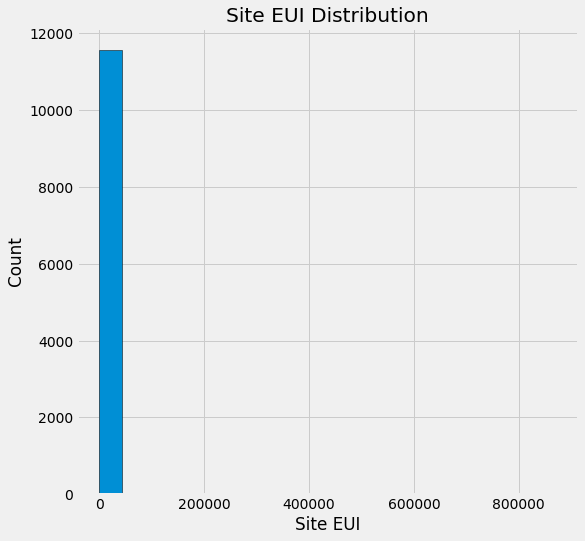

In [21]:
figsize(8, 8)

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [22]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [23]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [25]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5,1,'Site EUI Distribution')

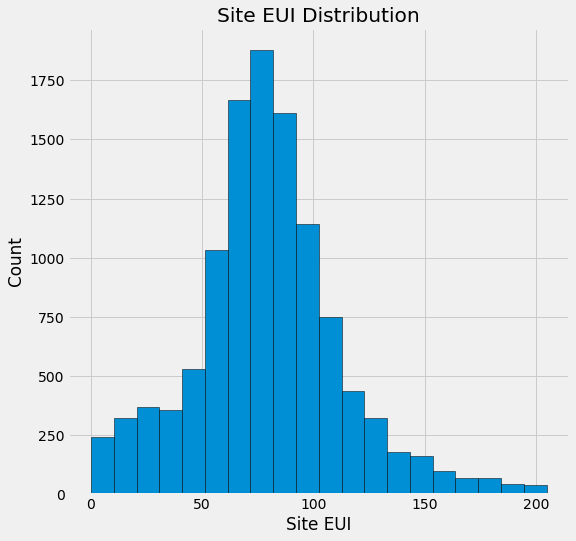

In [30]:
figsize(8, 8)

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor= 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [31]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5,1,'Density Plot of Energy Star Scores by Building Type')

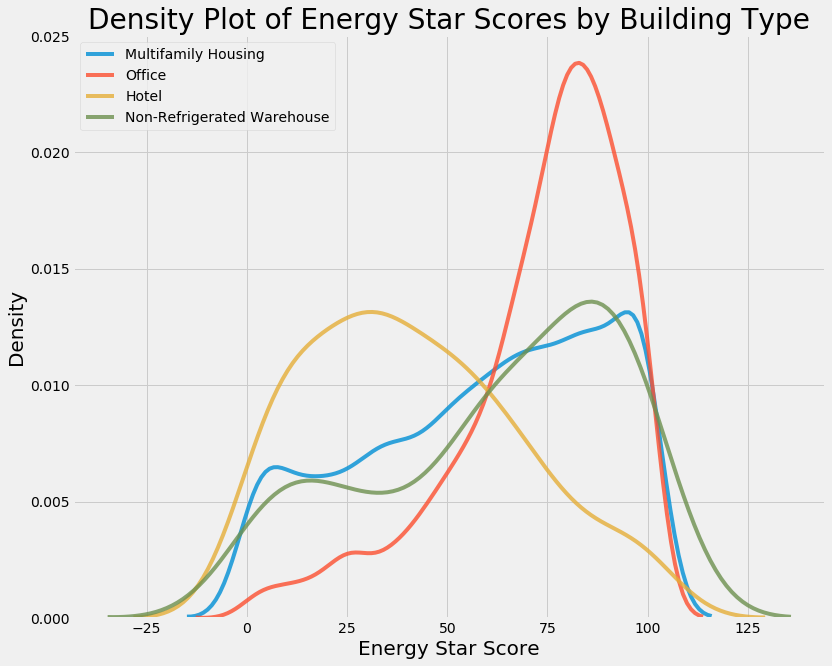

In [33]:
figsize(12, 10)

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

In [39]:
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5,1,'Density Plot of Energy Star Scores by Borough')

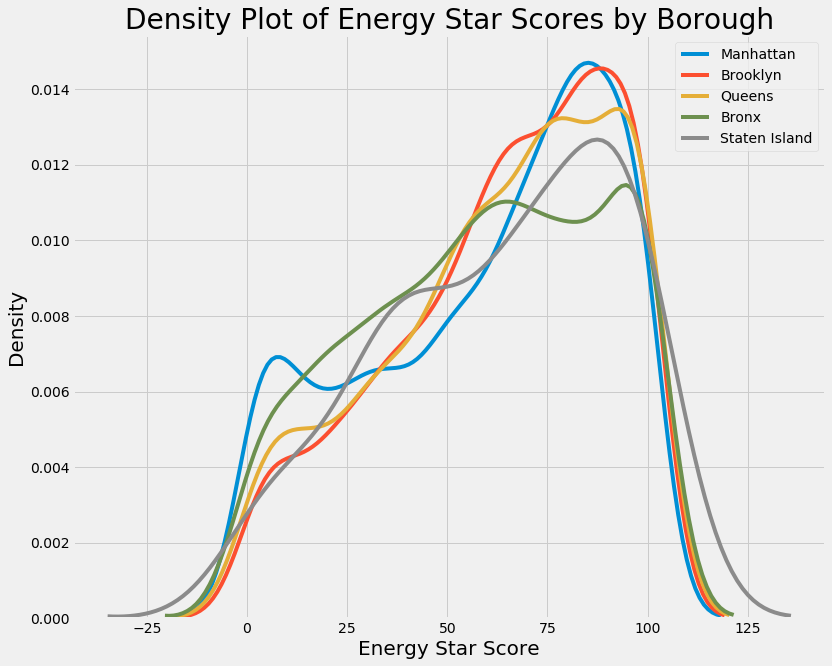

In [40]:
figsize(12, 10)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(), label = borough)

plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

In [44]:
correlations_data = data.corr()['score'].sort_values()
print(correlations_data.head(15), '\n')
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Property Id                                                  -0.046605
Longitude                                                    -0.037455
Occupa

In [45]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = data[['Borough', 'Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis=1)

features = features.dropna(subset = ['score'])


        

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,Weather Normalized Site Electricity (kWh),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,...,3249755.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN
17,20,2777309,NaN,323000.0,1907,7,100,NaN,120.0,125.2,...,5217062.4,598000.0,NaN,NaN,188.7,NaN,NaN,NaN,NaN,NaN
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,...,1121931.8,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,...,820016.2,204720.0,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,...,308074.6,116744.0,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0
21,24,2806486,NaN,189766.0,1911,2,100,100.0,68.0,NaN,...,1156269.9,189766.0,NaN,NaN,115.6,NaN,NaN,NaN,NaN,NaN
22,25,4988686,151666.0,130629.0,1911,1,100,100.0,23.7,23.4,...,894049.0,130629.0,NaN,NaN,74.3,40.773465,-73.962116,8.0,4.0,130.0
23,26,4988688,64827.0,54913.0,1911,1,100,100.0,17.9,17.4,...,262377.2,54913.0,231.9,4.22,53.9,40.773843,-73.961838,8.0,4.0,130.0
24,27,2809896,NaN,535632.0,1964,2,100,NaN,115.9,118.8,...,1620.0,535632.0,8984.2,16.77,121.7,NaN,NaN,NaN,NaN,NaN
25,28,4954491,256528.0,256528.0,1964,1,100,NaN,0.0,0.0,...,0.0,256528.0,NaN,NaN,0.0,40.816968,-73.960754,9.0,7.0,211.0
